In [174]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data(seed=69)

#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.8)

#http://lib.stat.cmu.edu/datasets/boston
columns_X = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
             'B', 'LSTAT']


print(X_train.shape)
print(X_test.shape)
#print(X_val.shape)

(404, 13)
(102, 13)


In [175]:
import pandas as pd

Xy_train_df = pd.DataFrame(data=X_train, columns=columns_X)
Xy_train_df['MEDV'] = y_train

Xy_test_df = pd.DataFrame(data=X_test, columns=columns_X)
Xy_test_df['MEDV'] = y_test
Xy_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.24103,0.0,7.38,0.0,0.4930,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,22.2
1,6.96215,0.0,18.10,0.0,0.7000,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1
2,0.17134,0.0,10.01,0.0,0.5470,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76,18.3
3,0.20746,0.0,27.74,0.0,0.6090,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
4,0.19073,22.0,5.86,0.0,0.4310,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.04684,0.0,3.41,0.0,0.4890,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6
98,0.13117,0.0,8.56,0.0,0.5200,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09,20.4
99,8.20058,0.0,18.10,0.0,0.7130,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94,13.5
100,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5


In [176]:
#normalize columnwise to [0,1]
def normalize_df(df):
   df_norm = pd.DataFrame()
   for column in df.columns:
      max = df[column].max()
      min = df[column].min()
      df_norm[column] = (df[column]-min)/(max-min)
   return df_norm

Xy_train_df_norm = normalize_df(Xy_train_df.iloc[:,:-1])
Xy_train_df_norm['MEDV'] = Xy_train_df.iloc[:,-1]
Xy_test_df_norm = normalize_df(Xy_test_df.iloc[:,:-1])
Xy_test_df_norm['MEDV'] = Xy_test_df.iloc[:,-1]
Xy_test_df_norm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.003356,0.000000,0.232278,0.0,0.197452,0.272577,0.420185,0.447389,0.173913,0.189293,0.813953,1.000000,0.367889,22.2
1,0.102331,0.000000,0.636501,0.0,0.636943,0.170705,0.969104,0.083178,1.000000,0.913958,0.883721,0.993721,0.529566,15.1
2,0.002330,0.000000,0.331448,0.0,0.312102,0.229901,0.878476,0.139186,0.217391,0.466539,0.604651,0.867844,0.479042,18.3
3,0.002862,0.000000,1.000000,0.0,0.443737,0.000000,0.979403,0.072333,0.130435,1.000000,0.872093,0.800534,1.000000,8.1
4,0.002616,0.231579,0.174962,0.0,0.065817,0.447412,0.150360,0.698999,0.260870,0.271511,0.755814,0.991967,0.134731,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000497,0.000000,0.082579,0.0,0.188960,0.364537,0.650875,0.204860,0.043478,0.156788,0.604651,0.988002,0.218937,22.6
98,0.001739,0.000000,0.276772,0.0,0.254777,0.284692,0.847580,0.103625,0.173913,0.374761,0.965116,0.976589,0.416542,20.4
99,0.120568,0.000000,0.636501,0.0,0.664544,0.232104,0.797116,0.172179,1.000000,0.913958,0.883721,0.000000,0.523204,13.5
100,0.000324,1.000000,0.055053,0.0,0.034183,0.759912,0.312049,0.416295,0.130435,0.068834,0.244186,0.989527,0.031811,48.5


In [177]:
model = keras.Sequential([
    keras.layers.Dense(units=13, activation="relu", input_shape=[X_train.shape[1]]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=13, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=1)
])
model.compile(optimizer="sgd", loss="mean_squared_error", metrics=["mean_squared_error"])

history = model.fit(Xy_train_df_norm.iloc[:,:-1], Xy_train_df_norm.iloc[:,-1], 
    validation_data=(Xy_test_df_norm.iloc[:,:-1], Xy_test_df_norm.iloc[:,-1]),
    batch_size=20,
    epochs=50,)

Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 162.1491 - mean_squared_error: 162.1491 - val_loss: 474.6548 - val_mean_squared_error: 474.6548
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 37.7774 - mean_squared_error: 37.7774 - val_loss: 95.5002 - val_mean_squared_error: 95.5002
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 33.5264 - mean_squared_error: 33.5264 - val_loss: 103.4050 - val_mean_squared_error: 103.4050
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 39.3677 - mean_squared_error: 39.3677 - val_loss: 117.0081 - val_mean_squared_error: 117.0081
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 37.1923 - mean_squared_error: 37.1923 - val_loss: 63.9920 - val_mean_squared_error: 63.9920
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 33.5397 - mean_squared_error: 33.5397 - val_loss: 113.7239 - val_mean_squared_error: 113.7239
Epoch

In [178]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 13)                182       
                                                                 
 batch_normalization_23 (Ba  (None, 13)                52        
 tchNormalization)                                               
                                                                 
 dense_49 (Dense)            (None, 13)                182       
                                                                 
 batch_normalization_24 (Ba  (None, 13)                52        
 tchNormalization)                                               
                                                                 
 dense_50 (Dense)            (None, 1)                 14        
                                                                 
Total params: 482 (1.88 KB)
Trainable params: 430 (1.

In [179]:
model2 = keras.Sequential([
    keras.layers.Dense(units=13, activation="relu", input_shape=[X_train.shape[1]]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=13, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=1)
])
model2.compile(optimizer="sgd", loss="mean_squared_error", metrics=["mean_squared_error"])

history2 = model2.fit(X_train, y_train, 
    validation_data=(X_test, y_test),
    batch_size=20,
    epochs=50,)

Epoch 1/50
21/21 [==============================] - 1s 9ms/step - loss: 184.1089 - mean_squared_error: 184.1089 - val_loss: 252.6528 - val_mean_squared_error: 252.6528
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 68.3054 - mean_squared_error: 68.3054 - val_loss: 4769.5840 - val_mean_squared_error: 4769.5840
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 65.8294 - mean_squared_error: 65.8294 - val_loss: 211.9431 - val_mean_squared_error: 211.9431
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 67.2877 - mean_squared_error: 67.2877 - val_loss: 89.8072 - val_mean_squared_error: 89.8072
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 72.0323 - mean_squared_error: 72.0323 - val_loss: 547.8273 - val_mean_squared_error: 547.8273
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 67.1178 - mean_squared_error: 67.1178 - val_loss: 62.6591 - val_mean_squared_error: 62.6591
Epoc

In [180]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 13)                182       
                                                                 
 batch_normalization_25 (Ba  (None, 13)                52        
 tchNormalization)                                               
                                                                 
 dense_52 (Dense)            (None, 13)                182       
                                                                 
 batch_normalization_26 (Ba  (None, 13)                52        
 tchNormalization)                                               
                                                                 
 dense_53 (Dense)            (None, 1)                 14        
                                                                 
Total params: 482 (1.88 KB)
Trainable params: 430 (1.

Minimum validation loss: 19.296234130859375


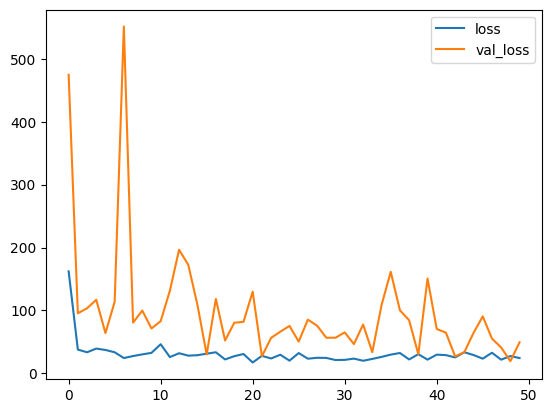

In [181]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 62.657958984375


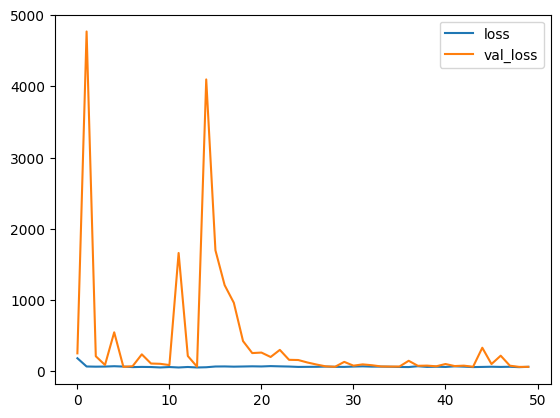

In [185]:
history_df2 = pd.DataFrame(history2.history)
history_df2.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df2['val_loss'].min()))